In [30]:
import matplotlib.pyplot as plt;
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
                                                            # simple linear Regression

In [3]:
df = pd.read_excel("Book1.xlsx")
print(df)


    area   price
0  26000  550000
1  30000  565000
2  32000  610000
3  36000  680000
4  40000  725000


Text(0, 0.5, 'price($)')

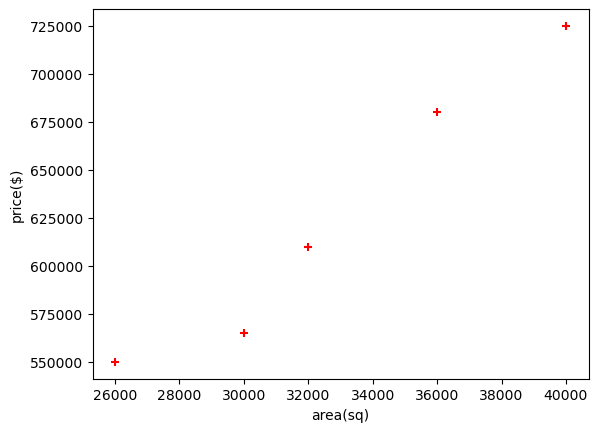

In [5]:
plt.scatter(df.area , df.price, color= "red", marker= "+")
plt.xlabel("area(sq)")
plt.ylabel("price($)")


In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)


LinearRegression()

In [9]:
reg.predict([[33000]])

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [11]:
x =reg.coef_

In [13]:
y =reg.intercept_

In [15]:
z = x*33000 + y
print(z)

[628715.75342466]


In [17]:
                                                                        # practice

Index(['year', 'per capita income (US$)'], dtype='object')


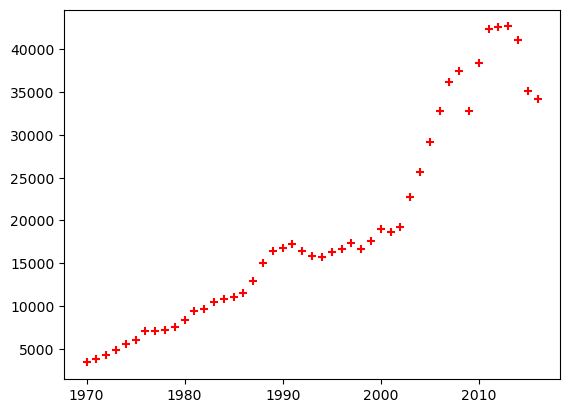

In [19]:
df = pd.read_csv("canada_per_capita_income.csv")
print(df.columns)

plt.scatter(df["year"], df["per capita income (US$)"], marker= "+", color="red")


In [21]:
reg.fit(df[["year"]], df["per capita income (US$)"])
reg.predict([[2020]])

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [23]:
print(reg.coef_)
print(reg.intercept_)
print(2020 * reg.coef_ +reg.intercept_)

[828.46507522]
-1632210.7578554575
[41288.69409442]


In [25]:
                                                                    # multi-linear regression models

In [54]:
df = pd.read_excel("book2.xlsx")
print(df)

   area  bedroom  age   price
0  3400      3.0   23   50000
1  4560      6.0    2  120000
2  5600      NaN   15   76000
3  6500      3.0    8   48000
4  7800      5.0   17   90000
5  8900      2.0   25   10000


In [56]:
average = df.bedroom.median()

import math
a = math.floor(average)
df.bedroom = df.bedroom.fillna(a)
df.bedroom

0    3.0
1    6.0
2    3.0
3    3.0
4    5.0
5    2.0
Name: bedroom, dtype: float64

In [58]:
reg = linear_model.LinearRegression()
reg.fit(df[["area","bedroom","age"]],df.price )
reg.predict([[3400, 4, 5]])

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87236.61285735])

In [60]:
print(reg.coef_)
print(reg.intercept_)

[-3.35156467e+00  2.00909984e+04 -5.73434706e+02]
21135.11286915667


In [62]:
-3.35156467e+00 * 3400 + 2.00909984e+04 * 4 + -5.73434706e+02 * 5 + 21135.11286915667

87236.61306115668

In [68]:
df = pd.read_excel("Book2-2.xlsx")
df
p = reg.predict(df)

df["price"] = p;
print(p)
df.to_excel("book2-2.xlsx", index=False)

,area,bedroom,age,price
0,7892,3,12,48076.343048
1,6279,6,45,94832.066612
2,3400,4,6,86663.178151


In [ ]:
                                                                 # saving the model into a file via "Pickle" & "Joblib"

In [76]:
import pickle 
with open ("model_name", "wb") as f:
    pickle.dump(reg, f)

In [83]:
with open ("model_name", "rb") as f:
    m = pickle.load(f)

m.predict([[3400, 4, 5]])

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87236.61285735])

In [ ]:
                                                                                # joblib

In [89]:
import joblib

joblib.dump(reg, "model_joblib")

k = joblib.load("model_joblib")
k.predict([[3400, 4, 5]])

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87236.61285735])

In [1]:
                                                                            # get_dummies 

In [103]:
df = pd.read_csv("carprices.csv")

In [101]:
dummy = pd.get_dummies(df["Car Model"],dtype=int)

In [99]:
final = pd.concat([df, dummy], axis=1)
final =final.drop(["Car Model","Mercedez Benz C class"], axis=1)

In [97]:
x = final.drop(["Sell Price($)"], axis = 1)
y = final["Sell Price($)"]

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
model.predict([[60000, 12, 0,0]])

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20779.85677389])

In [ ]:
                                                                                #OneHotEncoding

In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df
dfle["Car Model"] = le.fit_transform(dfle["Car Model"])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [189]:
x = dfle[["Car Model","Mileage", "Age(yrs)" ]].values
y = dfle["Sell Price($)"].values
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [1]:
from sklearn.preprocessing import OneHotEncoder                                #deprecated
ohe = OneHotEncoder(categorical_features = [0])
f = ohe.fit_transform(x).toarray()


In [229]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
                                                                                # OG
ohe = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), [0]) ],
    remainder='passthrough'  
)
f = column_transformer.fit_transform(x)
x = f[:, 1:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [231]:
model.fit(x,y)
model.predict([[1,0,69000,6]])

array([18705.2723644])

In [233]:
model.score(x, y)

0.9417050937281083

In [ ]:
                                                            # train_test_split method
                                                        

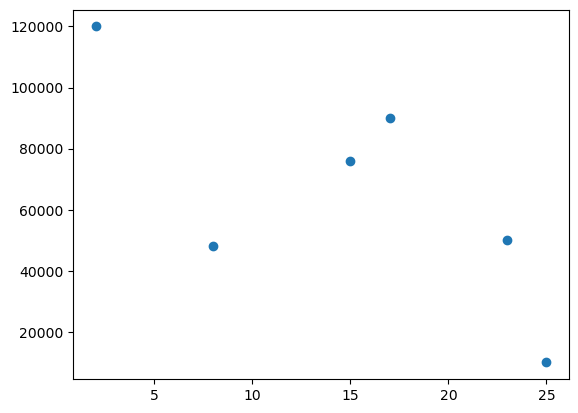

In [122]:
df = pd.read_excel("book2.xlsx")                             #only used for three dim
df
y = df["price"]
x = df[['area', 'bedroom', 'age']]

plt.scatter( df["age"], df["price"])

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [85]:
print(len(x_train))

4


In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [100]:
model.predict(x_test)

array([70507.35294118, 37427.94117647])

In [128]:
y_test

3    48000
5    10000
Name: price, dtype: int64

In [130]:
model.score(x_test, y_test)

-0.7435912653720478

In [ ]:
                                                          #logistic Regression

In [102]:

df = pd.read_csv("HR_comma_sep.csv")
df.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [52]:
# employeee salary on retention
le = df[df.left == 1]
print(le.shape)
re = df[df.left == 0]
print(re.shape)

(3571, 10)
(11428, 10)


In [78]:
k = df.drop(["Department", "salary"], axis=1)
k = k.groupby("left").mean()
k

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

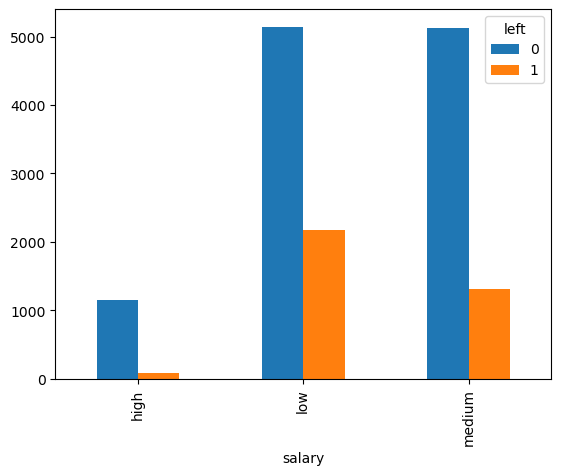

In [100]:
pd.crosstab(df.salary, df.left).plot(kind="bar")

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["satisfaction_level","last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]], df["left"], test_size=0.1)


model = LogisticRegression()


C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:

model.fit(X_train, y_train) 

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
model.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [127]:
model.score(X_test, y_test)

0.7546666666666667